# PCA

**PCA** staat voor **_Principal Components Analysis_**. PCA is net als lineaire regressie een primaire techniek voor patroonherkenning in de wereld van ML, maar in tegenstelling tot lineaire regressie, is de techniek **_niet_ gebaseerd op een model** van de werkelijkheid (of de oorsprong van de data). 

Het is een techniek die vaak gebruikt wordt om hoog-dimensionele feature vectoren samen te drukken in een kleinere vectorruimte met behoud van de belangrijkste proportie van de variantie in de originele ruimte. De essentie is echter dat deze techniek **feature matrices, die potentieel gecorreleerd zijn, projecteert op** een nieuwe set van ongecorreleerde variabelen, de **principale componenten**.

## Belangrijkste toepassingen

- **Dimensionaliteitsreductie**: Comprimeren van hoog-dimensionele data naar een lagere dimensie
- **Visualisatie**: Projecteren van data naar 2D of 3D voor visualisatie
- **Ruisreductie**: Behouden van enkel grootste bronnen van variatie in de data
- **Feature decorrelatie**: Verwijderen van {ref}`multicollineariteit <target-multicollinearity>`

## Basis intuïtie
We illustreren de basis met $500$ gesimuleerde datapunten uit een 2D normaalverdeling met:
- gemiddeldes
$\pmb{\mu} = \begin{bmatrix}
15 & 230
\end{bmatrix}^T$,
- varianties $\pmb{\sigma^2} = \begin{bmatrix}
100 & 25
\end{bmatrix}^T$ en
- correlatie-coefficient $r=0.6$.  
  
De {ref}`covariantie-matrix <target-covariance-matrix>` $\pmb{\Sigma}$ van deze verdeling $\mathcal{N}(\pmb{\mu}, \pmb{\Sigma})$ heeft de volgende vorm:

$$
\begin{align}
\pmb{\Sigma} &= \begin{bmatrix}
\sigma_{1}^2 & \sigma_{1, 2} \cr
\sigma_{1, 2} & \sigma_{2}^2 \cr
\end{bmatrix} \cr
&= \begin{bmatrix}
\sigma_{1}^2 & r\sigma_1\sigma_2 \cr
r\sigma_1\sigma_2 & \sigma_{2}^2 \cr
\end{bmatrix} \cr
&= \begin{bmatrix}
100 & 30 \cr
30 & 25 \cr
\end{bmatrix}
\end{align}
$$

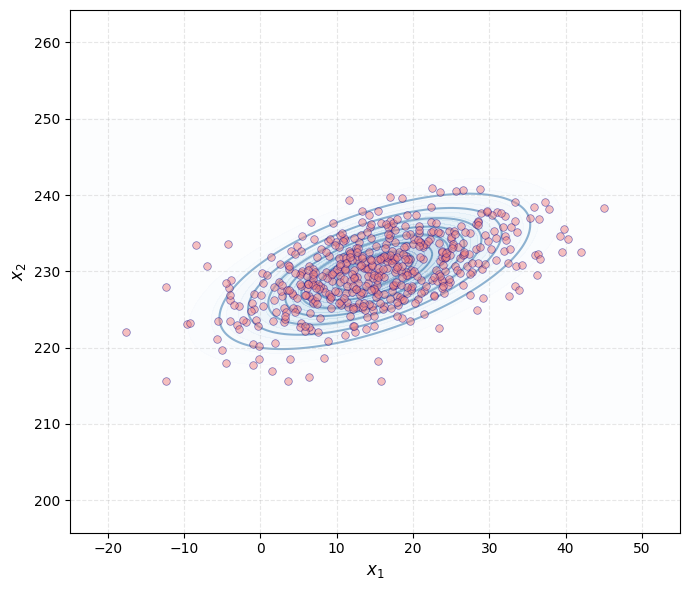

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Random number generator for reproducibility
rng = np.random.default_rng(42)

# Parameters
N = 500  # Increased number of samples
mu = np.array([15, 230])
sigma1, sigma2 = 10, 5  # Standard deviations (sqrt of variances 100 and 25)
r = 0.6  # Correlation coefficient

# Covariance matrix
cov_matrix = np.array([[sigma1**2, r * sigma1 * sigma2], [r * sigma1 * sigma2, sigma2**2]])

# Generate samples from 2D Gaussian
X = rng.multivariate_normal(mu, cov_matrix, N)

# Create grid for contour plot of the true distribution
x_range = np.linspace(mu[0] - 4 * sigma1, mu[0] + 4 * sigma1, 200)
y_range = np.linspace(mu[1] - 4 * sigma2, mu[1] + 4 * sigma2, 200)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
pos = np.dstack((X_grid, Y_grid))

# Compute joint PDF
rv = stats.multivariate_normal(mu, cov_matrix)
Z = rv.pdf(pos)

# Create visualization
fig, ax = plt.subplots(figsize=(7, 6))

# Plot contours of the true distribution (behind everything)
contour = ax.contour(
    X_grid, Y_grid, Z, levels=8, colors="steelblue", linewidths=1.5, alpha=0.6, zorder=1
)
contourf = ax.contourf(X_grid, Y_grid, Z, levels=20, cmap="Blues", alpha=0.2, zorder=0)

# Plot samples
ax.scatter(
    X[:, 0],
    X[:, 1],
    alpha=0.5,
    s=30,
    edgecolors="darkblue",
    linewidth=0.5,
    color="lightcoral",
    zorder=3,
)

# Styling
ax.set_xlabel("$x_1$", fontsize=12, fontweight="bold")
ax.set_ylabel("$x_2$", fontsize=12, fontweight="bold")
ax.grid(True, alpha=0.3, linestyle="--")
ax.set_aspect("equal", adjustable="datalim")

plt.tight_layout()
plt.show()

Als we kijken naar de assen die door de oorspronkelijke data gevormd worden (in het blauw), zien we dat die niet samen lopen met de "vorm" van de variatie in sample. De assen in het rood daarentegen, liggen wel in de richting van de variatie.

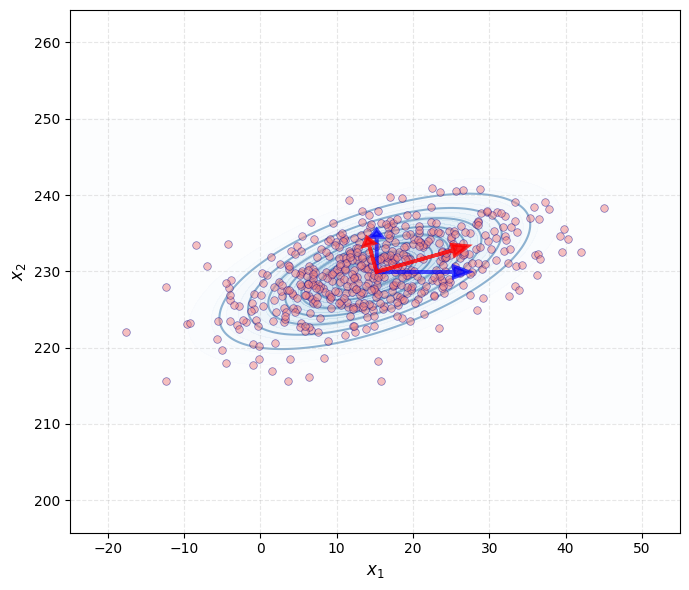

In [2]:
# Compute sample mean
X_mean = X.mean(axis=0)

# Compute sample covariance matrix
X_centered = X - X_mean
sample_cov = (X_centered.T @ X_centered) / (N - 1)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(sample_cov)

# Sort by eigenvalues (descending)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Use standard deviations directly (no extra scaling)
# For principal components: length = sqrt(eigenvalue) = standard deviation
pc1 = eigenvectors[:, 0] * np.sqrt(eigenvalues[0])
pc2 = eigenvectors[:, 1] * np.sqrt(eigenvalues[1])

# For original axes: use sample standard deviations
std_x1 = np.sqrt(sample_cov[0, 0])
std_x2 = np.sqrt(sample_cov[1, 1])

# Create visualization
fig, ax = plt.subplots(figsize=(7, 6))

# Plot contours of the true distribution (behind everything)
contour = ax.contour(
    X_grid, Y_grid, Z, levels=8, colors="steelblue", linewidths=1.5, alpha=0.6, zorder=1
)
contourf = ax.contourf(X_grid, Y_grid, Z, levels=20, cmap="Blues", alpha=0.2, zorder=0)

# Plot samples
ax.scatter(
    X[:, 0],
    X[:, 1],
    alpha=0.5,
    s=30,
    edgecolors="darkblue",
    linewidth=0.5,
    color="lightcoral",
    zorder=3,
)

# Plot original axes (blue arrows) - using standard deviations
ax.arrow(
    X_mean[0],
    X_mean[1],
    std_x1,
    0,
    head_width=1.5,
    head_length=2,
    fc="blue",
    ec="blue",
    linewidth=2.5,
    alpha=0.7,
    label="Original axes",
    zorder=4,
)
ax.arrow(
    X_mean[0],
    X_mean[1],
    0,
    std_x2,
    head_width=1.5,
    head_length=1,
    fc="blue",
    ec="blue",
    linewidth=2.5,
    alpha=0.7,
    zorder=4,
)

# Plot principal component axes (red arrows) - using standard deviations
ax.arrow(
    X_mean[0],
    X_mean[1],
    pc1[0],
    pc1[1],
    head_width=1.5,
    head_length=2,
    fc="red",
    ec="red",
    linewidth=2.5,
    alpha=0.8,
    label="Principal components",
    zorder=4,
)
ax.arrow(
    X_mean[0],
    X_mean[1],
    pc2[0],
    pc2[1],
    head_width=1.5,
    head_length=1,
    fc="red",
    ec="red",
    linewidth=2.5,
    alpha=0.8,
    zorder=4,
)

# Styling
ax.set_xlabel("$x_1$", fontsize=12, fontweight="bold")
ax.set_ylabel("$x_2$", fontsize=12, fontweight="bold")
ax.grid(True, alpha=0.3, linestyle="--")

ax.set_aspect("equal", adjustable="datalim")

plt.tight_layout()
plt.show()

(target-eigenvectors)=
De rode assen zijn de zogenaamde **eigenvectoren** van de covariantiematrix $\pmb{\Sigma}$ van de data.
De eigenvectoren geven de **natuurlijke richtingen van variatie** in de data aan:
- Eerste principale component (PC1): De richting waarin de data het meest varieert. Dit is de eigenvector met de grootste eigenwaarde. Als we de data op deze as projecteren, behouden we het maximale deel van de variantie.

- Tweede principale component (PC2): De richting waarin de data het tweede meest varieert, **orthogonaal** (loodrecht) op PC1. Dit zorgt ervoor dat de principale componenten onderling ongecorreleerd zijn.  
  
De lengte van de rode pijlen is proportioneel met de standaarddeviatie (wortel van de eigenwaarde) langs die richting. We zien duidelijk dat PC1 langer is dan PC2, wat betekent dat de data meer gespreid is in de richting van PC1.  
  
In tegenstelling tot de originele blauwe assen ($x_1$ en $x_2$), die willekeurig gekozen zijn en niet aansluiten bij de structuur van de data, **vangen de principale componenten de inherente geometrie van de data op**.  
  
Aan de hand van de hoek tussen het originele assenstelsel en het stelsel van de eigenvectoren, kunnen we de data projecteren in de ruimte van de principale componenten.

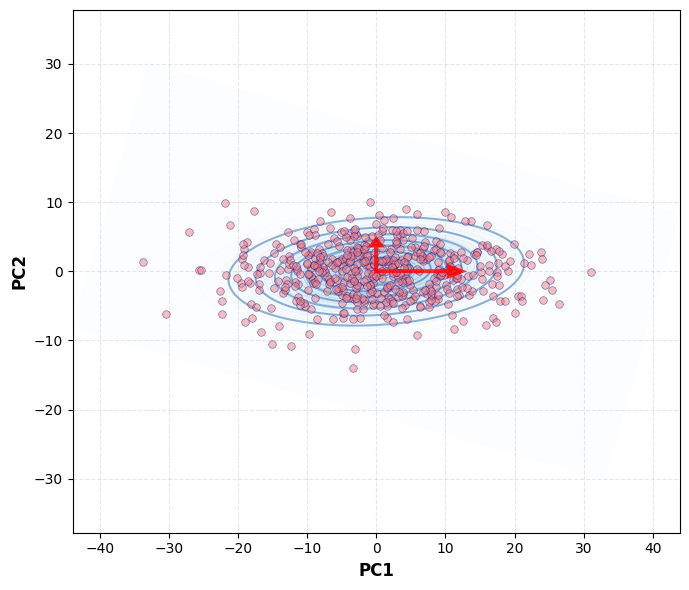

In [3]:
# Transform data to principal component space
X_transformed = X_centered @ eigenvectors

# The mean in the transformed space is at the origin
X_transformed_mean = np.array([0, 0])

# Standard deviations in PC space are sqrt(eigenvalues)
pc_std1 = np.sqrt(eigenvalues[0])
pc_std2 = np.sqrt(eigenvalues[1])

# Create visualization in PC space
fig, ax = plt.subplots(figsize=(7, 6))

# Transform grid to PC space for contours
X_grid_centered = X_grid - mu[0]
Y_grid_centered = Y_grid - mu[1]
grid_centered = np.stack([X_grid_centered, Y_grid_centered], axis=-1)
grid_transformed = grid_centered @ eigenvectors

# Plot contours in transformed space
contour = ax.contour(
    grid_transformed[:, :, 0],
    grid_transformed[:, :, 1],
    Z,
    levels=8,
    colors="steelblue",
    linewidths=1.5,
    alpha=0.6,
    zorder=1,
)
contourf = ax.contourf(
    grid_transformed[:, :, 0],
    grid_transformed[:, :, 1],
    Z,
    levels=20,
    cmap="Blues",
    alpha=0.2,
    zorder=0,
)

# Plot transformed samples
ax.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    alpha=0.5,
    s=30,
    edgecolors="darkblue",
    linewidth=0.5,
    color="lightcoral",
    zorder=3,
)

# Plot principal component axes (red arrows) in their own coordinate system
ax.arrow(
    0,
    0,
    pc_std1,
    0,
    head_width=1.5,
    head_length=2,
    fc="red",
    ec="red",
    linewidth=2.5,
    alpha=0.8,
    label="PC1",
    zorder=4,
)
ax.arrow(
    0,
    0,
    0,
    pc_std2,
    head_width=1.5,
    head_length=1,
    fc="red",
    ec="red",
    linewidth=2.5,
    alpha=0.8,
    label="PC2",
    zorder=4,
)

# Styling
ax.set_xlabel("PC1", fontsize=12, fontweight="bold")
ax.set_ylabel("PC2", fontsize=12, fontweight="bold")
ax.grid(True, alpha=0.3, linestyle="--")
ax.set_aspect("equal", adjustable="datalim")

plt.tight_layout()
plt.show()

## Eigenwaardedecompositie

De principale componenten worden verkregen via eigenwaardedecompositie van de covariantie-matrix $\pmb{\Sigma}$. De covariantie-matrix is altijd een vierkante matrix. 
Een eigenvector $\pmb{v}$ van een vierkante matrix $\pmb{A}$ is een vector $\pmb{v} \neq \pmb{0}$ die na transformatie door $\pmb{A}$ alleen van lengte verandert, maar niet van richting:

$$
\pmb{A}\pmb{v} = \lambda \pmb{v}
$$

waarbij $\lambda$ de bijbehorende eigenwaarde is die aangeeft met welke factor de eigenvector wordt geschaald.

Voor PCA passen we dit toe op de covariantiematrix $\pmb{\Sigma}$. Omdat $\pmb{\Sigma}$ een $d \times d$ matrix is (waarbij $d$ het aantal features is), heeft deze matrix $d$ eigenvectoren en bijbehorende eigenwaarden. We duiden deze aan met subscript $i$ voor $i=1, \ldots, d$:

$$
\pmb{\Sigma}\pmb{v}_i = \lambda_i \pmb{v}_i \quad \text{voor } i=1, \ldots, d
$$

Als we alle $d$ eigenvector-vergelijkingen samenvoegen, kunnen we dit in matrixnotatie schrijven. We stapelen alle eigenvectoren als kolommen in een matrix $\pmb{V}$:

$$
\pmb{V} = \begin{bmatrix} \pmb{v}_1 & \pmb{v}_2 & \cdots & \pmb{v}_d \end{bmatrix}
$$

en alle eigenwaarden op de diagonaal van matrix $\pmb{\Lambda}$:

$$
\pmb{\Lambda} = \begin{bmatrix}
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_d
\end{bmatrix}
$$

Dan kunnen we alle vergelijkingen $\pmb{\Sigma}\pmb{v}_i = \lambda_i \pmb{v}_i$ tegelijk schrijven als:

$$
\pmb{\Sigma}\pmb{V} = \pmb{V}\pmb{\Lambda}
$$

Omdat de eigenvectoren orthonormaal zijn (loodrecht op elkaar en lengte 1), geldt $\pmb{V}^T\pmb{V} = \pmb{I}$, en dus $\pmb{V}^T = \pmb{V}^{-1}$. Dit geeft de **eigenwaarde-decompositie**:

$$
\pmb{\Sigma} = \pmb{V}\pmb{\Lambda}\pmb{V}^T
$$

:::{note} Praktische berekening via SVD
:class: dropdown
In de praktijk worden $\pmb{V}$ en $\pmb{\Lambda}$ vaak bekomen via de singuliere waarden decompositie (SVD) van de gecentreerde data $\pmb{X}_{\text{centered}}$, in plaats van via directe eigenwaarde-decompositie van $\pmb{\Sigma}$.

De SVD ontbindt een willekeurige matrix $\pmb{X}_{\text{centered}}$ (met dimensie $N \times d$) als volgt:

$$
\pmb{X}_{\text{centered}} = \pmb{U}\pmb{S}\pmb{V}^T
$$

waarbij:
- $\pmb{U}$ een $N \times N$ orthonormale matrix is (linker singuliere vectoren)
- $\pmb{S}$ een $N \times d$ diagonaalmatrix is met singuliere waarden $s_1 \geq s_2 \geq \cdots \geq s_d \geq 0$
- $\pmb{V}$ een $d \times d$ orthonormale matrix is (rechter singuliere vectoren)

Verband met PCA:

Als we de covariantie-matrix uitschrijven met behulp van de SVD:

$$
\pmb{\Sigma} = \frac{1}{N-1}\pmb{X}_{\text{centered}}^T \pmb{X}_{\text{centered}} = \frac{1}{N-1}(\pmb{U}\pmb{S}\pmb{V}^T)^T (\pmb{U}\pmb{S}\pmb{V}^T)
$$

$$
= \frac{1}{N-1}\pmb{V}\pmb{S}^T\pmb{U}^T\pmb{U}\pmb{S}\pmb{V}^T = \frac{1}{N-1}\pmb{V}\pmb{S}^T\pmb{S}\pmb{V}^T
$$

Omdat $\pmb{S}^T\pmb{S}$ een diagonaalmatrix is met $s_i^2$ op de diagonaal, zien we:

$$
\pmb{\Sigma} = \pmb{V} \left(\frac{1}{N-1}\pmb{S}^T\pmb{S}\right) \pmb{V}^T = \pmb{V}\pmb{\Lambda}\pmb{V}^T
$$

Dit toont dat:
- De rechter singuliere vectoren $\pmb{V}$ van $\pmb{X}_{\text{centered}}$ exact de eigenvectoren van $\pmb{\Sigma}$ zijn
- De eigenwaarden zijn gegeven door $\lambda_i = \frac{s_i^2}{N-1}$

Waarom SVD gebruiken?
1. Numerieke stabiliteit: SVD is numeriek stabieler, vooral als $\pmb{\Sigma}$ bijna singulier is
2. Efficiëntie: Voor grote datasets met $N \gg d$ is SVD direct op $\pmb{X}$ sneller dan eerst $\pmb{\Sigma}$ berekenen (dimensie $d \times d$)
3. Geheugen: Vermijdt het opslaan van de $d \times d$ covariantie-matrix, wat belangrijk is bij zeer hoog-dimensionele data
:::

## Praktische toepassing

In dit voorbeeld passen we PCA toe op moderne tekstembeddings om te illustreren hoe de techniek gebruikt wordt bij hoog-dimensionele data. We gebruiken BERT (_Bidirectional Encoder Representations from Transformers_), een state-of-the-art taalmodel dat zinnen omzet naar semantisch rijke vectorrepresentaties.

We gebruiken de _AG News_ dataset met 4 nieuwscategorieën:
- `World` (wereldnieuws)
- `Sports` (sport)
- `Business` (zakelijk)
- `Sci/Tech` (wetenschap & technologie)

Elk nieuwsartikel wordt door BERT gerepresenteerd als een 768-dimensionale vector die de semantische betekenis van de tekst vastlegt.

PCA helpt ons om:
1. De dimensionaliteit drastisch te reduceren (van 768 naar 2 dimensies)
2. De semantische structuur te behouden (documenten over hetzelfde onderwerp blijven dicht bij elkaar)
3. De data te visualiseren in 2D om patronen te ontdekken

In [4]:
import torch
from datasets import load_dataset
from sklearn.decomposition import PCA
from transformers import AutoModel, AutoTokenizer

# 1. Load AG News dataset (4 news categories)
dataset = load_dataset("ag_news", split="test")  # Use test split for speed

# Sample 1000 articles for computational efficiency (250 per category)
samples_per_class = 250
indices = []
for label in range(4):
    label_indices = [i for i, item in enumerate(dataset) if item["label"] == label]
    indices.extend(rng.choice(label_indices, samples_per_class, replace=False))

dataset_sampled = dataset.select(indices)
texts = [item["text"] for item in dataset_sampled]
y = np.array([item["label"] for item in dataset_sampled])
target_names = ["World", "Sports", "Business", "Sci/Tech"]

# 2. Load pre-trained BERT model for embeddings
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")
model.eval()  # Set to evaluation mode

# 3. Generate BERT embeddings
embeddings = []

with torch.no_grad():  # Disable gradient computation for efficiency
    for i, text in enumerate(texts):
        # Tokenize and encode text (truncate to 512 tokens max)
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

        # Get BERT embeddings (use [CLS] token embedding as document representation)
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
        embeddings.append(cls_embedding)

X_bert = np.array(embeddings)

# 4. Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_bert)

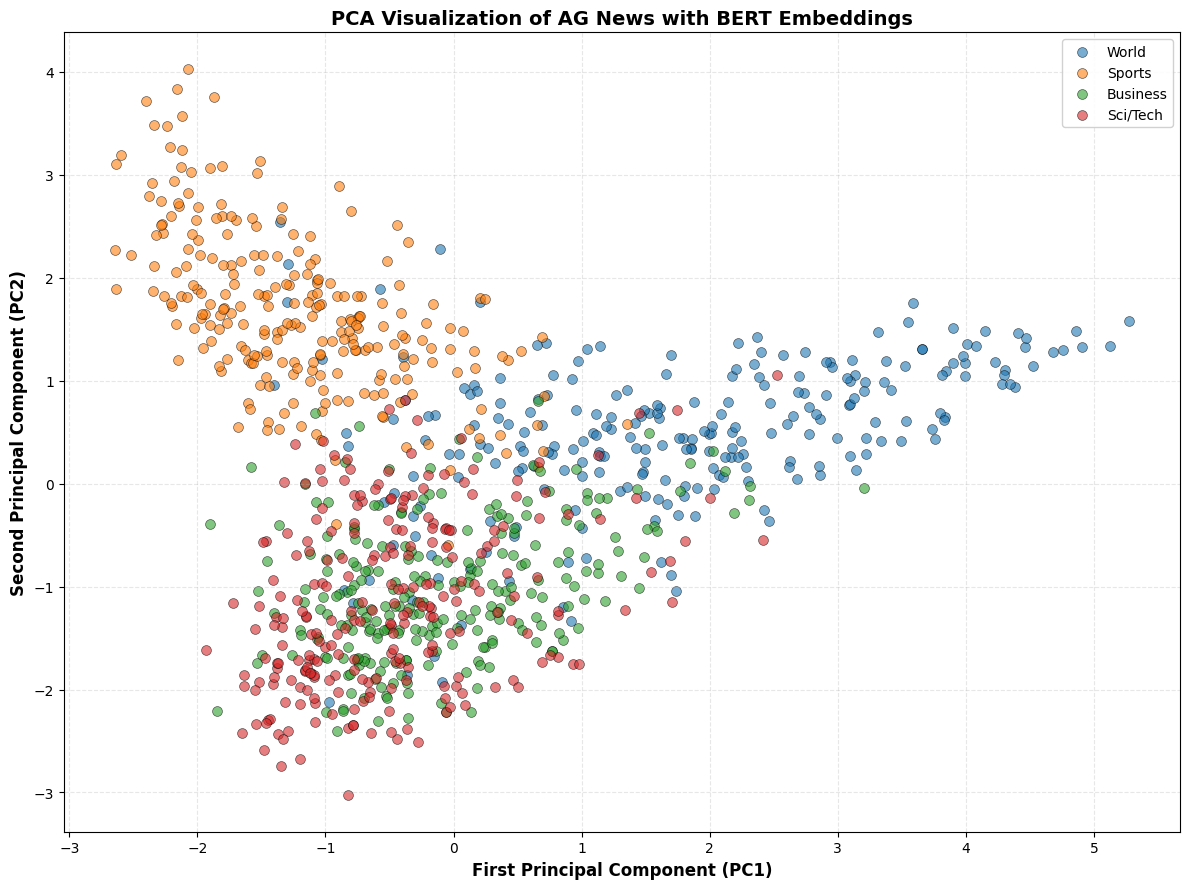

In [5]:
# 5. Visualize the results
fig, ax = plt.subplots(figsize=(12, 9))

# Plot each category with a different color
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
for i, (name, color) in enumerate(zip(target_names, colors, strict=True)):
    mask = y == i
    ax.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=color,
        label=name,
        alpha=0.6,
        s=50,
        edgecolors="k",
        linewidth=0.5,
    )

ax.set_xlabel("First Principal Component (PC1)", fontsize=12, fontweight="bold")
ax.set_ylabel("Second Principal Component (PC2)", fontsize=12, fontweight="bold")
ax.set_title("PCA Visualization of AG News with BERT Embeddings", fontsize=14, fontweight="bold")
ax.legend(loc="best", framealpha=0.9, fontsize=10)
ax.grid(True, alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()